In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.init as init
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchinfo import summary
import seaborn as sns
import matplotlib.pyplot as plt
from ptflops import get_model_complexity_info
import os
from utils import *
from custom_layer import *
from base_model import *
import json

In [2]:
torch.set_num_threads(6)
# torch.set_num_interop_threads(1)
torch.backends.mkldnn.enabled = True

In [3]:
state = json.load(open('../../../dataset/DogVsCatDataset/preprocessed/final_split1/dataset_splits.json', 'r'))

criterion = torch.nn.CrossEntropyLoss()
train_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["train80"], batch_size=40)
test_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["test20"], batch_size=40)

In [4]:
model0_0 = Model0(
    norm=nn.BatchNorm2d(10),
    pool=lambda x : HybridPoolingV0(x),
    post_conv=post_conv0
)
he_initialization(model0_0)
describe(model0_0)

MACs: 30.52 MMac, Params: 8.25 k
Layer (type:depth-idx)                   Output Shape              Param #
Model0                                   [1, 2]                    --
├─BatchNorm2d: 1-1                       [1, 10, 128, 128]         20
├─Sequential: 1-2                        [1, 10, 64, 64]           --
│    └─Conv2d: 2-1                       [1, 20, 128, 128]         1,000
│    └─Sequential: 2-2                   [1, 20, 128, 128]         --
│    │    └─BatchNorm2d: 3-1             [1, 20, 128, 128]         40
│    │    └─PReLU: 3-2                   [1, 20, 128, 128]         1
│    └─HybridPoolingV0: 2-3              [1, 20, 64, 64]           --
│    │    └─MaxPool2d: 3-3               [1, 20, 64, 64]           --
│    │    └─AvgPool2d: 3-4               [1, 20, 64, 64]           --
│    │    └─Sequential: 3-5              [1, 20, 64, 64]           40
│    └─Conv2d: 2-4                       [1, 10, 64, 64]           990
│    └─Sequential: 2-5                   [1, 10, 

Loading checkpoint from model_weights/model0_0.pt
Starting
Epoch 1/10: Train loss = 0.4967, Train accuracy = 0.7554, Test loss = 0.4993, Test accuracy = 0.7534


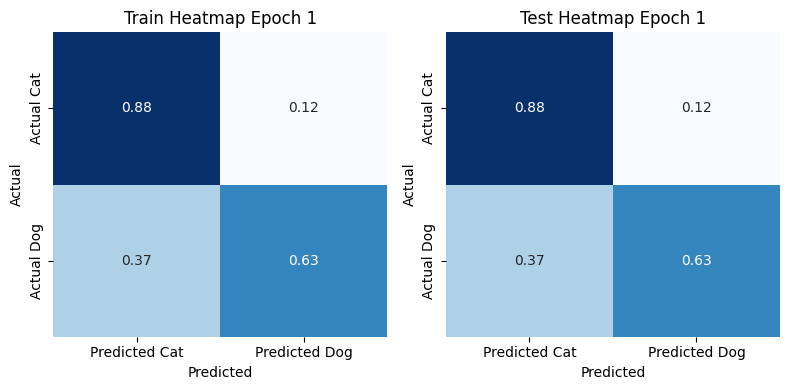

Epoch 2/10: Train loss = 0.4240, Train accuracy = 0.8030, Test loss = 0.4324, Test accuracy = 0.7972


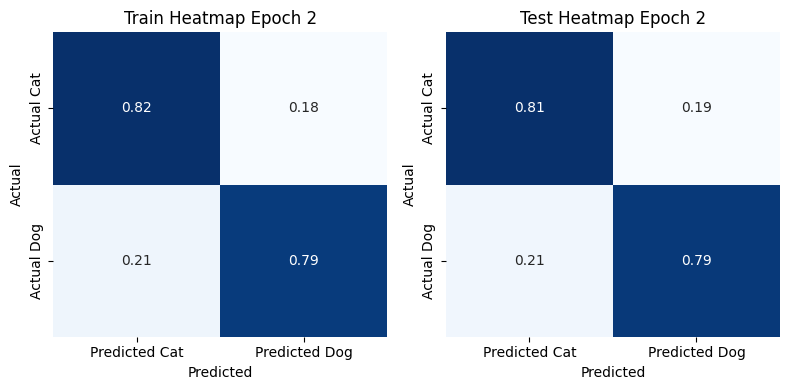

Epoch 3/10: Train loss = 0.3879, Train accuracy = 0.8220, Test loss = 0.4017, Test accuracy = 0.8122


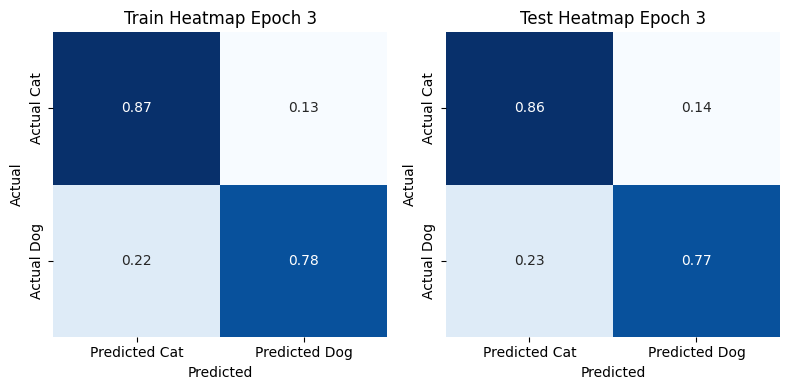

Epoch 4/10: Train loss = 0.3690, Train accuracy = 0.8317, Test loss = 0.3815, Test accuracy = 0.8253


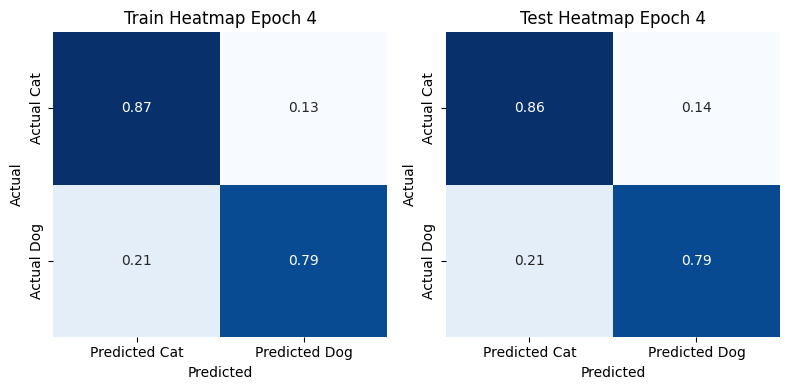

Epoch 5/10: Train loss = 0.3549, Train accuracy = 0.8423, Test loss = 0.3764, Test accuracy = 0.8300


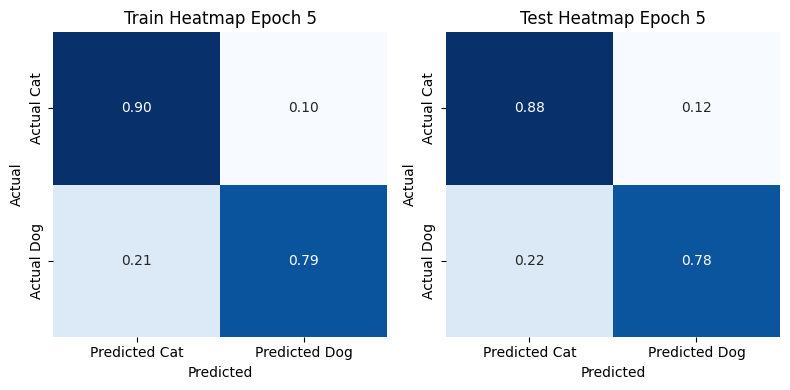

Epoch 6/10: Train loss = 0.3274, Train accuracy = 0.8560, Test loss = 0.3515, Test accuracy = 0.8417


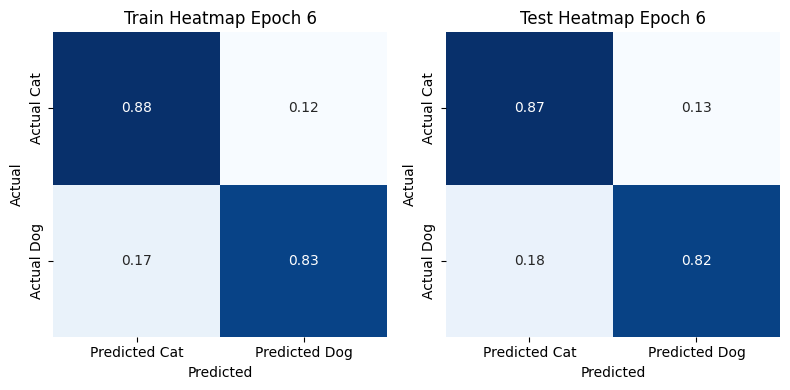

Epoch 7/10: Train loss = 0.3240, Train accuracy = 0.8590, Test loss = 0.3508, Test accuracy = 0.8441


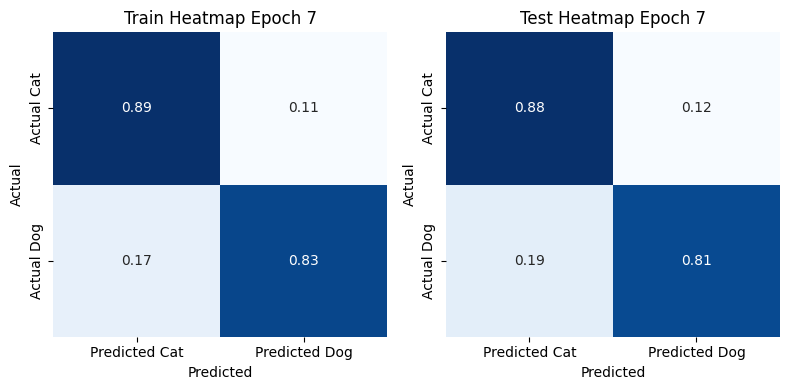

Epoch 8/10: Train loss = 0.2976, Train accuracy = 0.8712, Test loss = 0.3358, Test accuracy = 0.8551


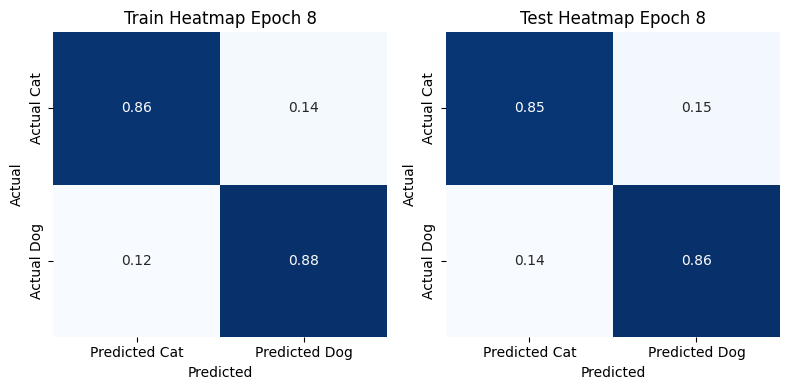

Epoch 9/10: Train loss = 0.2930, Train accuracy = 0.8722, Test loss = 0.3326, Test accuracy = 0.8550


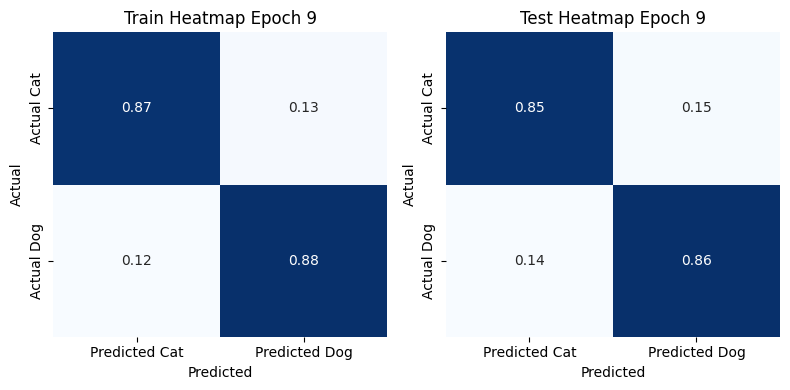

Epoch 10/10: Train loss = 0.2915, Train accuracy = 0.8734, Test loss = 0.3345, Test accuracy = 0.8548


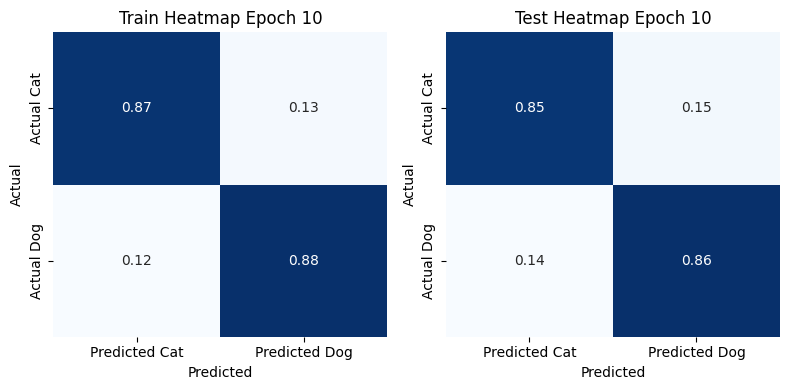

Training complete.


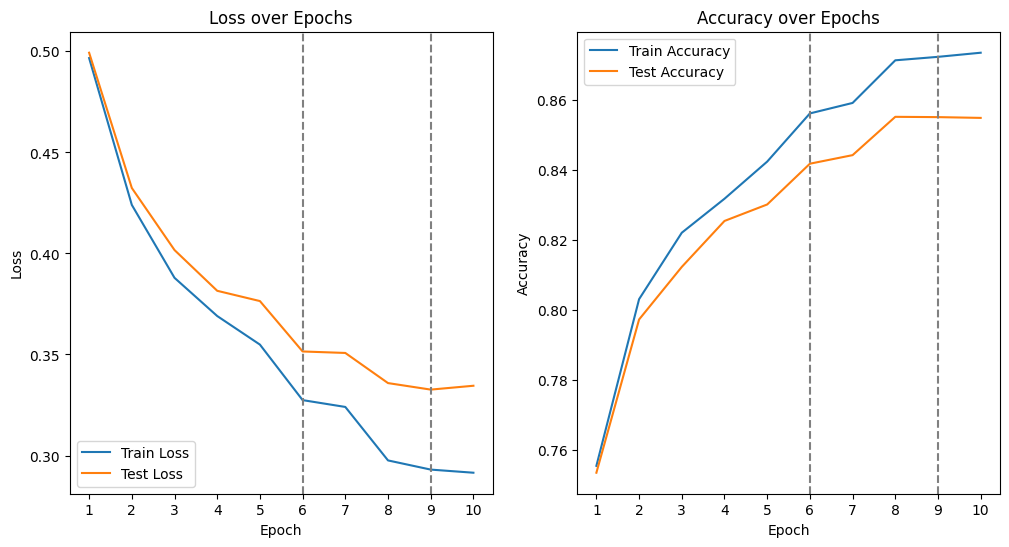

In [5]:
train(model0_0,"model_weights/model0_0.pt",criterion,train_dataset,test_dataset)

In [6]:
train_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["train80"], batch_size=16)
test_dataset = SplitLoader("../../../dataset/DogVsCatDataset/preprocessed/final_split1/",state["test20"], batch_size=16)

In [7]:
model0_1 = Model0(
    norm=nn.BatchNorm2d(10),
    pool=lambda x : HybridPoolingV0(x),
    post_conv=post_conv0
)
he_initialization(model0_1)
describe(model0_1)

MACs: 30.52 MMac, Params: 8.25 k
Layer (type:depth-idx)                   Output Shape              Param #
Model0                                   [1, 2]                    --
├─BatchNorm2d: 1-1                       [1, 10, 128, 128]         20
├─Sequential: 1-2                        [1, 10, 64, 64]           --
│    └─Conv2d: 2-1                       [1, 20, 128, 128]         1,000
│    └─Sequential: 2-2                   [1, 20, 128, 128]         --
│    │    └─BatchNorm2d: 3-1             [1, 20, 128, 128]         40
│    │    └─PReLU: 3-2                   [1, 20, 128, 128]         1
│    └─HybridPoolingV0: 2-3              [1, 20, 64, 64]           --
│    │    └─MaxPool2d: 3-3               [1, 20, 64, 64]           --
│    │    └─AvgPool2d: 3-4               [1, 20, 64, 64]           --
│    │    └─Sequential: 3-5              [1, 20, 64, 64]           40
│    └─Conv2d: 2-4                       [1, 10, 64, 64]           990
│    └─Sequential: 2-5                   [1, 10, 

Loading checkpoint from model_weights/model0_1.pt
Starting
Epoch 1/10: Train loss = 0.4760, Train accuracy = 0.7746, Test loss = 0.4820, Test accuracy = 0.7652


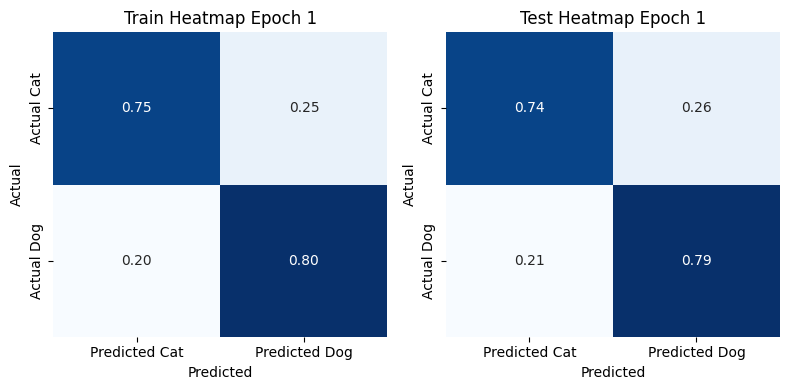

Epoch 2/10: Train loss = 0.4664, Train accuracy = 0.7905, Test loss = 0.4699, Test accuracy = 0.7816


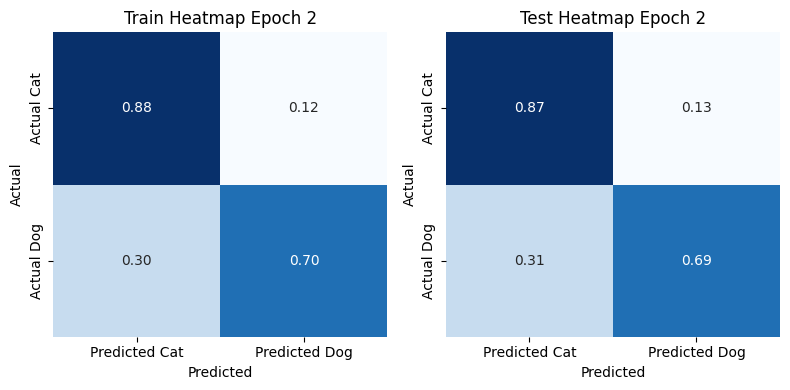

Epoch 3/10: Train loss = 0.3722, Train accuracy = 0.8311, Test loss = 0.3815, Test accuracy = 0.8270


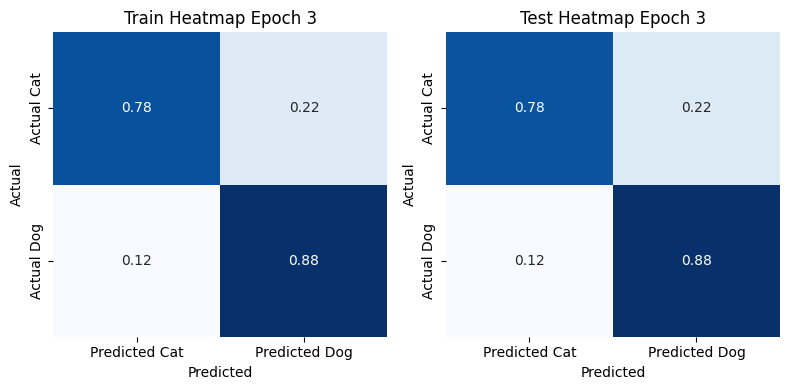

Epoch 4/10: Train loss = 0.3492, Train accuracy = 0.8453, Test loss = 0.3654, Test accuracy = 0.8347


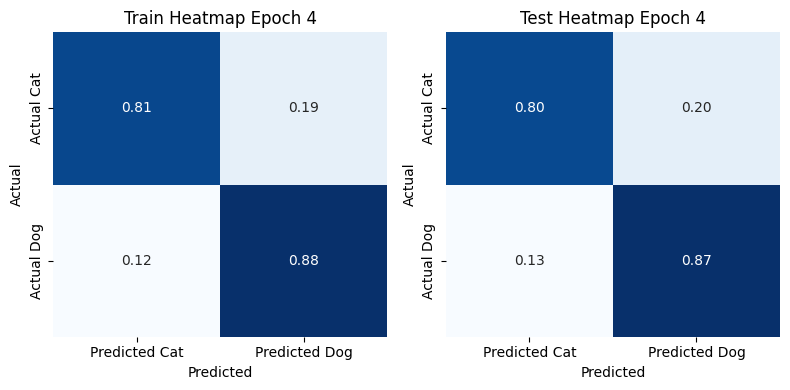

Epoch 5/10: Train loss = 0.3537, Train accuracy = 0.8463, Test loss = 0.3725, Test accuracy = 0.8361


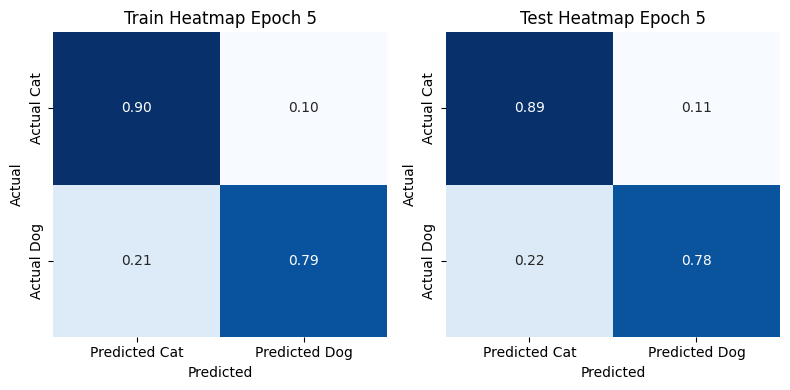

Epoch 6/10: Train loss = 0.3760, Train accuracy = 0.8374, Test loss = 0.4015, Test accuracy = 0.8249


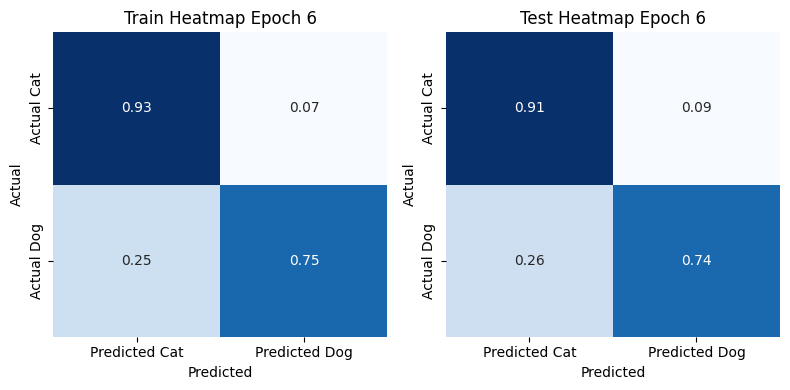

Epoch 7/10: Train loss = 0.3122, Train accuracy = 0.8632, Test loss = 0.3344, Test accuracy = 0.8506


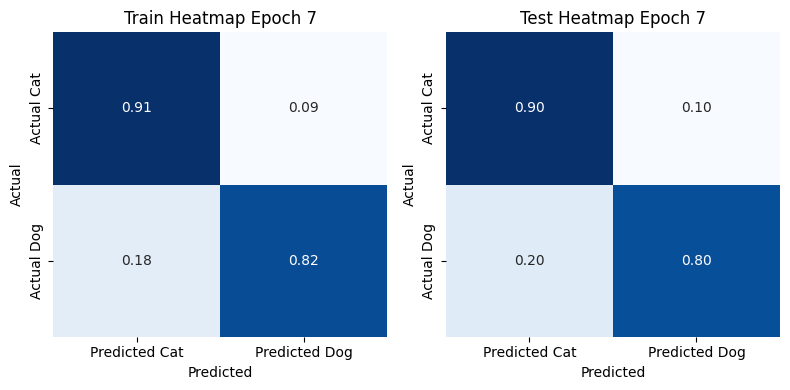

Epoch 8/10: Train loss = 0.2733, Train accuracy = 0.8833, Test loss = 0.3079, Test accuracy = 0.8659


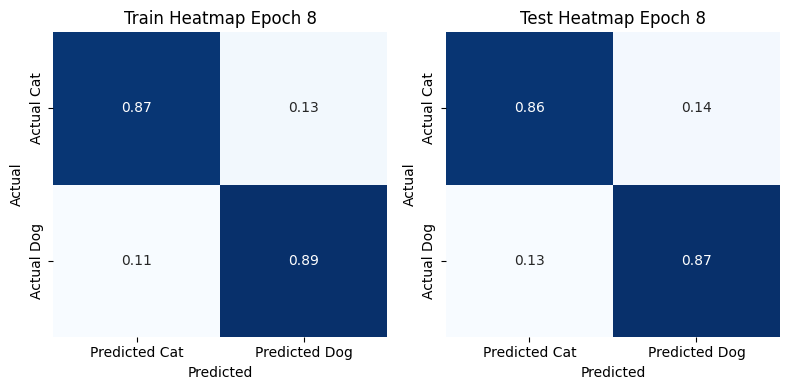

Epoch 9/10: Train loss = 0.2692, Train accuracy = 0.8851, Test loss = 0.3077, Test accuracy = 0.8653


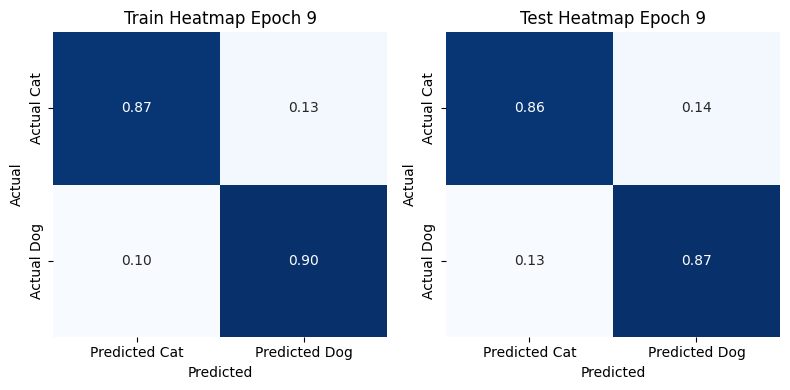

Epoch 10/10: Train loss = 0.2629, Train accuracy = 0.8867, Test loss = 0.3100, Test accuracy = 0.8656


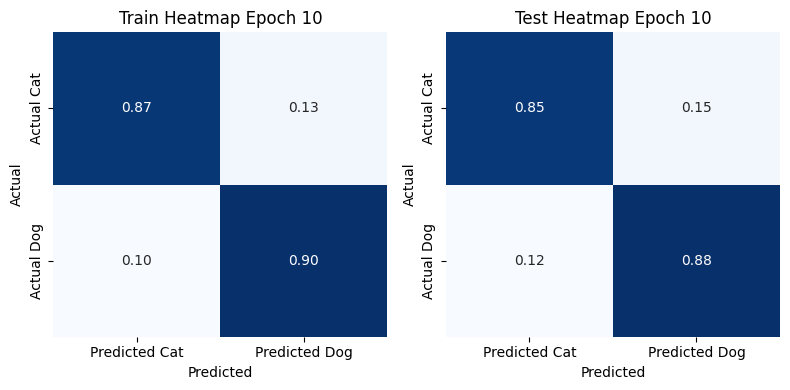

Training complete.


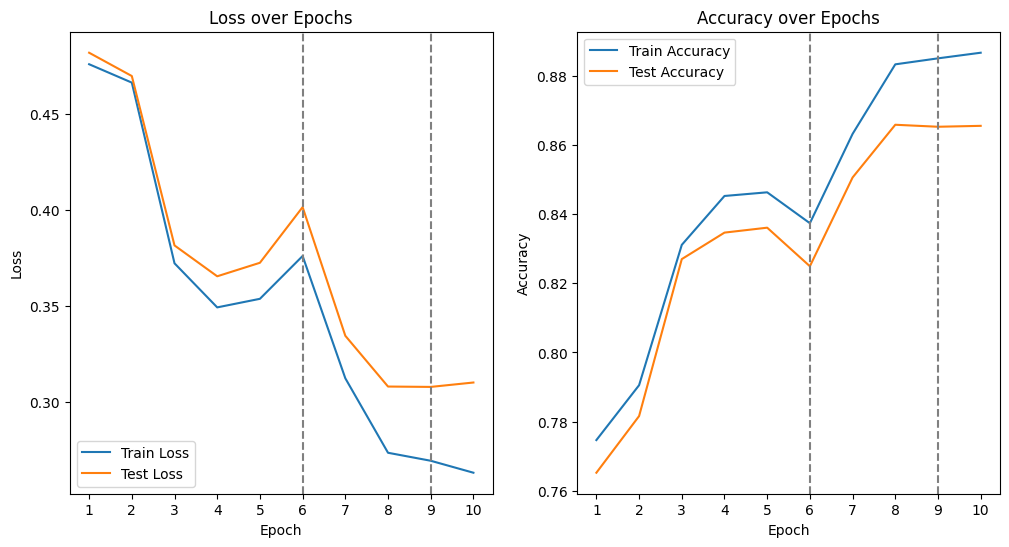

In [8]:
train(model0_1,"model_weights/model0_1.pt",criterion,train_dataset,test_dataset)